In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

df = pd.DataFrame({
    'Prénom':['jean','marie','pierre','arno','eric','lisa','anne'],
    'Age':[23,78,22,19,45,33,20],
    'Sexe':['M','F','M','M','M','F','M'],
    'Région':['nord','est','nord','est','sud','ouest','sud'],
    'NbrEnfant':[2,0,0,3,2,1,4],
    'NbrAnimaux':[5,1,0,5,2,2,3]
})


In [2]:
df

,Prénom,Age,Sexe,Région,NbrEnfant,NbrAnimaux
0,jean,23,M,nord,2,5
1,marie,78,F,est,0,1
2,pierre,22,M,nord,0,0
3,arno,19,M,est,3,5
4,eric,45,M,sud,2,2
5,lisa,33,F,ouest,1,2
6,anne,20,M,sud,4,3


Comme vous le savez, Pandas a une intégration étroite avec matplotlib.

Vous pouvez tracer des données directement à partir de votre DataFrame en utilisant la méthode plot() :

## Tracer deux colonnes de DataFrame sous forme de nuage de points.

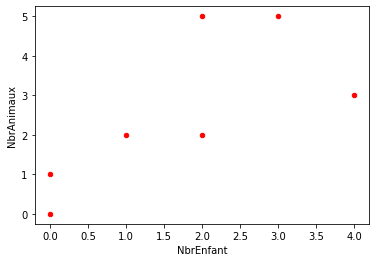

In [3]:
# comparaison NbrEnfant NbrAnimaux
df.plot(kind='scatter',x='NbrEnfant',y='NbrAnimaux',color='red')
plt.show()

## DataFrame sous forme de diagramme à barres

<AxesSubplot:xlabel='Prénom'>

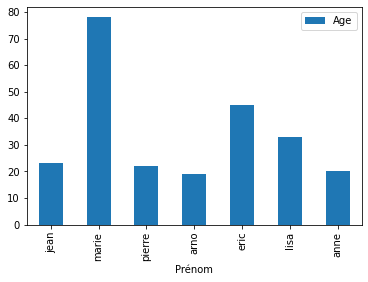

In [4]:
df.plot(kind='bar',x='Prénom',y='Age')

## Diagramme linéaire à colonnes multiples

Il suffit de réutiliser l'objet Axes.

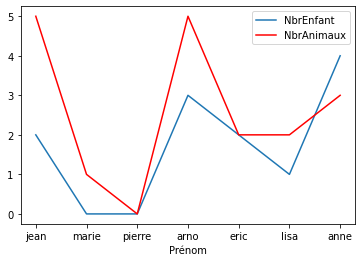

In [5]:
ax = plt.gca()

df.plot(kind='line',x='Prénom',y='NbrEnfant',ax=ax)
df.plot(kind='line',x='Prénom',y='NbrAnimaux', color='red', ax=ax)

# plt.show()
plt.savefig('graph2.png')

## Sauver un graph dans un fichier

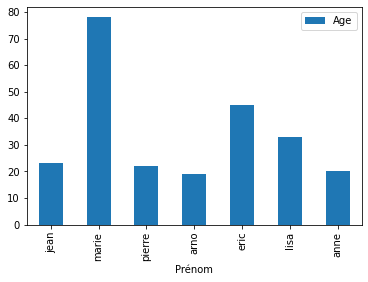

In [5]:
df.plot(kind='bar',x='Prénom',y='Age')

# Le graph est sauvé dans graph.pgn
plt.savefig('graph.png')


## Graph groupé par régions

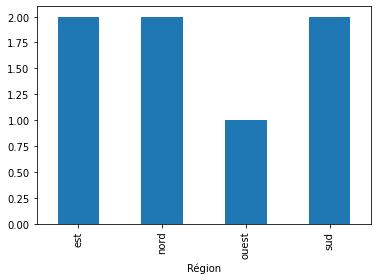

In [7]:
df.groupby('Région')['Prénom'].nunique().plot(kind='bar')
plt.show()

## Graph empilé avec un groupement

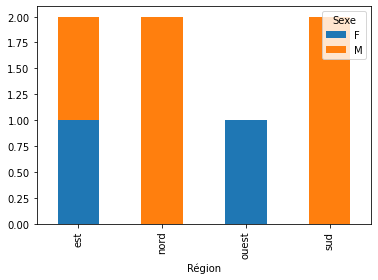

In [8]:
df.groupby(['Région','Sexe']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Un autre exemple : compter les gens par sexe

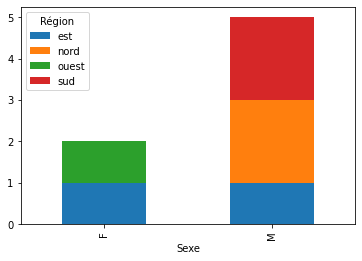

In [9]:
df.groupby(['Sexe','Région']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

## Diagramme à barres empilées avec vue en pourcentage, normalisé à 100%.


Parfois, vous n'êtes intéressé que par les distributions, et pas par les montants bruts :

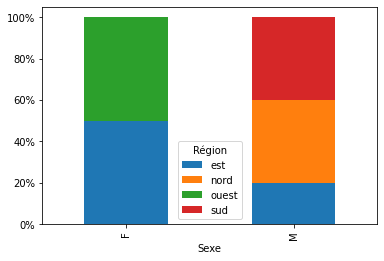

In [11]:
import matplotlib.ticker as mtick

df.groupby(['Sexe','Région'])['Age'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


## Tracer un histogramme des valeurs des colonnes.

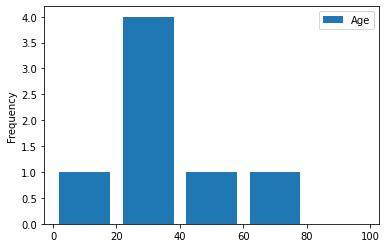

In [41]:
df[['Age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

## Histogramme des dates

Pour tracer un histogramme de date, vous devez d'abord convertir la colonne de date en datetime en utilisant pandas.to_datetime().

In [13]:
df = pd.DataFrame({
    'Prénom':['jean','marie','pierre','arno','eric','lisa'],
    'naissance':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})

df

,Prénom,naissance
0,jean,01/21/1988
1,marie,03/10/1977
2,pierre,07/25/1999
3,arno,01/22/1977
4,eric,09/30/1968
5,lisa,09/15/1970


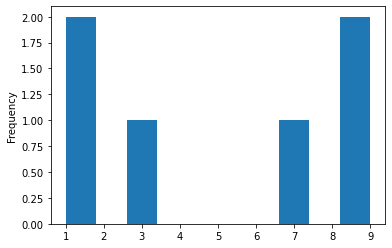

In [14]:
df['naissance'] = pd.to_datetime(df['naissance'],infer_datetime_format=True)

plt.clf()
df['naissance'].map(lambda d: d.month).plot(kind='hist')
plt.show()
